In [1]:
# load the libraries

#This sector is to load the libraries and prepare the tools.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt ##useful for time series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf    ##Ask the computer to draw the acf and pacf for us
from statsmodels.tsa.stattools import acf, pacf ##Ask the computer to compute them for us
from statsmodels.tsa.arima.model import ARIMA 


##Why do we use ARIMA instead of ARMA?
##Because the series is not stationary. So we use differencing (take the first difference) to make the series stationary.
##If the data is already stationary, then I =0.
##If the data becomes stationary because of taking the first difference, then I =1

from sklearn.metrics import mean_squared_error 


from statsmodels.tsa.stattools import acf, pacf, adfuller #df test

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv('Bitcoin Price Open.csv', index_col='Date')
df

,Bitcoin Price: Open (Only Weekdays)
Date,
1/2/2018,13625.00
1/3/2018,14978.20
1/4/2018,15270.70
1/5/2018,15477.20
1/8/2018,16476.20
...,...
12/27/2021,50802.61
12/28/2021,50679.86
12/29/2021,47623.87


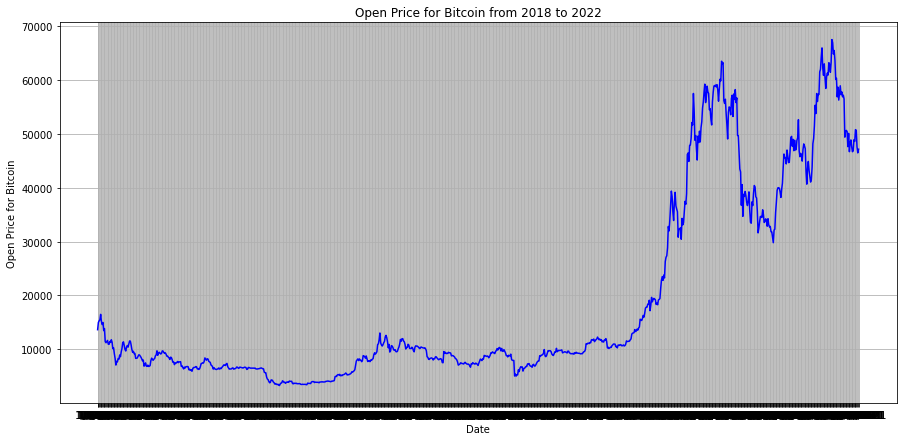

In [3]:
Bitcoin = df["Bitcoin Price: Open (Only Weekdays)"]
plt.figure(figsize=(15,7))
plt.plot(Bitcoin, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Open Price for Bitcoin')
plt.title('Open Price for Bitcoin from 2018 to 2022')
plt.grid(True)#It controls whether to show the grid in the background
plt.show()

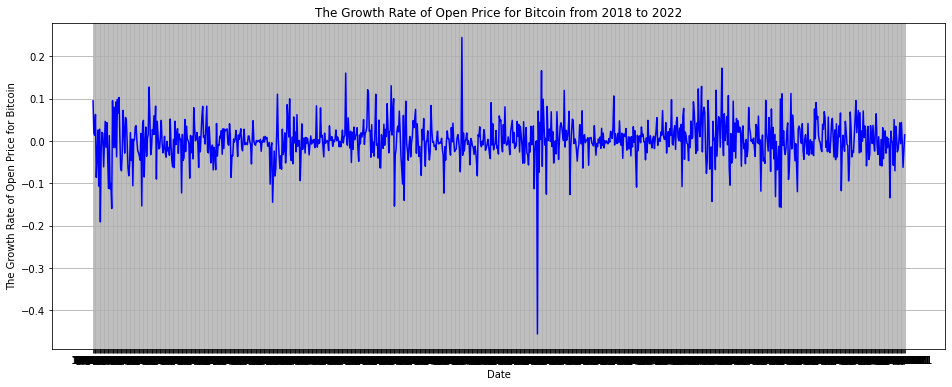

In [4]:
#np library
ln_Bitcoin = np.log(Bitcoin)
#take the natrual log of gdp data
r = ln_Bitcoin.diff(1).dropna()   # take the first difference and drop NaN
#The first year has no growth with the year before the first year

plt.figure(figsize=(16,6))
plt.plot(r, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('The Growth Rate of Open Price for Bitcoin')
plt.title('The Growth Rate of Open Price for Bitcoin from 2018 to 2022')
plt.grid(True)
plt.show()

In [5]:
#The bitcoin data is done.

In [6]:
ef = pd.read_csv('Daily Treasury Par Yield Curve Rates 1 Month.csv', index_col='Date')
ef

,Daily Treasury Par Yield Curve Rates 1 Month
Date,
1/2/2018,1.29
1/3/2018,1.29
1/4/2018,1.28
1/5/2018,1.27
1/8/2018,1.30
...,...
12/27/2021,0.04
12/28/2021,0.03
12/29/2021,0.01


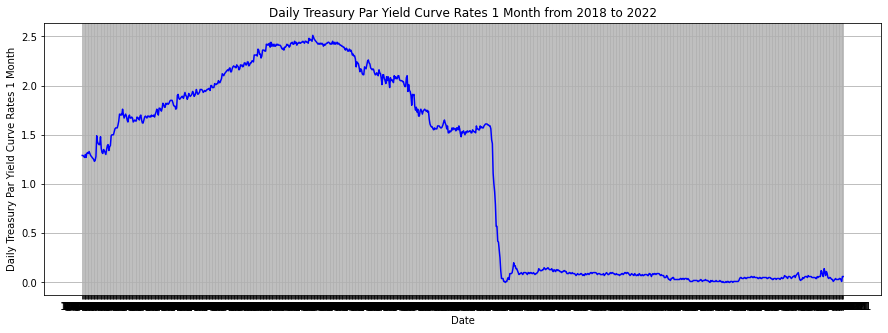

In [7]:
DailyTreasureRate1mo = ef["Daily Treasury Par Yield Curve Rates 1 Month"]
plt.figure(figsize=(15,5))
plt.plot(DailyTreasureRate1mo, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Treasury Par Yield Curve Rates 1 Month')
plt.title('Daily Treasury Par Yield Curve Rates 1 Month from 2018 to 2022')
plt.grid(True)#It controls whether to show the grid in the background
plt.show()

E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


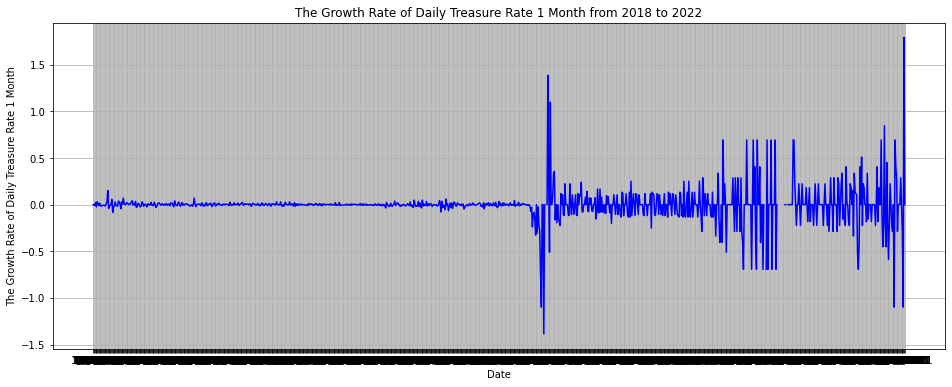

In [8]:
#np library
ln_DTR1mo = np.log(DailyTreasureRate1mo)
#take the natrual log of gdp data
q = ln_DTR1mo.diff(1).dropna()   # take the first difference and drop NaN
#The first year has no growth with the year before the first year

plt.figure(figsize=(16,6))
plt.plot(q, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('The Growth Rate of Daily Treasure Rate 1 Month')
plt.title('The Growth Rate of Daily Treasure Rate 1 Month from 2018 to 2022')
plt.grid(True)
plt.show()

In [9]:
#One interest rate is done.

In [10]:
ff = pd.read_csv('Daily Treasury Real Long-Term Rates.csv', index_col='Date')
ff

,Daily Treasury Real Long-Term Rates
Date,
1/2/2018,0.68
1/3/2018,0.67
1/4/2018,0.66
1/5/2018,0.66
1/8/2018,0.68
...,...
12/27/2021,-0.50
12/28/2021,-0.48
12/29/2021,-0.45


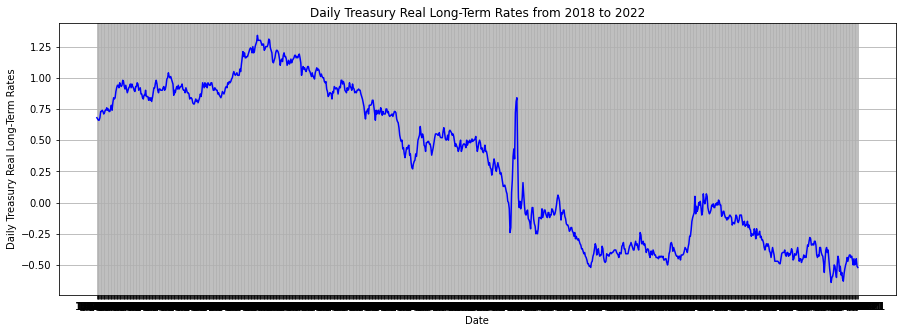

In [11]:
DailyTreasuryRealLongTermRates = ff["Daily Treasury Real Long-Term Rates "]
plt.figure(figsize=(15,5))
plt.plot(DailyTreasuryRealLongTermRates, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Daily Treasury Real Long-Term Rates')
plt.title('Daily Treasury Real Long-Term Rates from 2018 to 2022')
plt.grid(True)#It controls whether to show the grid in the background
plt.show()

E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


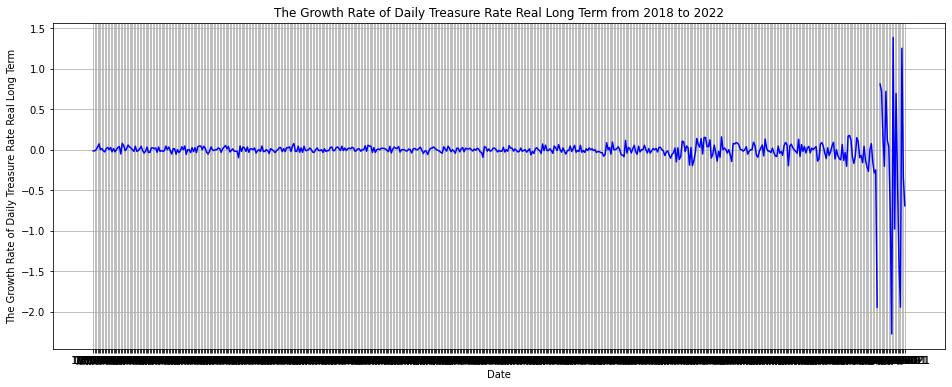

In [12]:
#np library
ln_DTRRLT = np.log(DailyTreasuryRealLongTermRates)
#take the natrual log of gdp data
w = ln_DTRRLT.diff(1).dropna()   # take the first difference and drop NaN
#The first year has no growth with the year before the first year

plt.figure(figsize=(16,6))
plt.plot(w, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('The Growth Rate of Daily Treasure Rate Real Long Term')
plt.title('The Growth Rate of Daily Treasure Rate Real Long Term from 2018 to 2022')
plt.grid(True)
plt.show()

In [13]:
#The Long term daily treasure rate is also done.

In [14]:
gf = pd.read_csv('Gold Price Open.csv', index_col='Date')
gf

,Gold Price Open
Date,
1/2/2018,1316.1
1/3/2018,1318.5
1/4/2018,1321.6
1/5/2018,1322.3
1/8/2018,1320.4
...,...
12/27/2021,1815.8
12/28/2021,1818.0
12/29/2021,1813.0


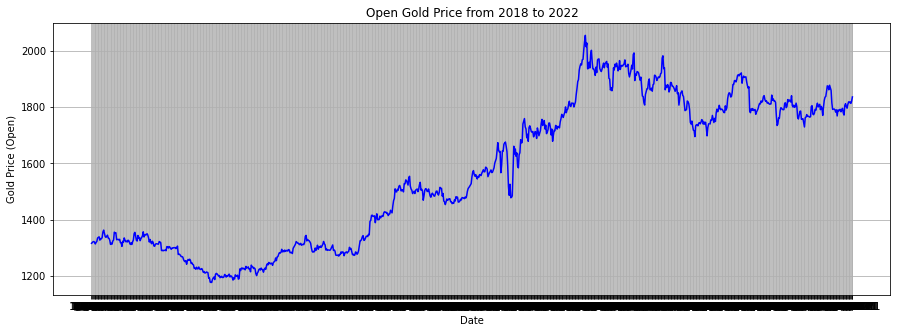

In [15]:
GoldPrice = gf["Gold Price Open"]
plt.figure(figsize=(15,5))
plt.plot(GoldPrice, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Gold Price (Open)')
plt.title('Open Gold Price from 2018 to 2022')
plt.grid(True)#It controls whether to show the grid in the background
plt.show()

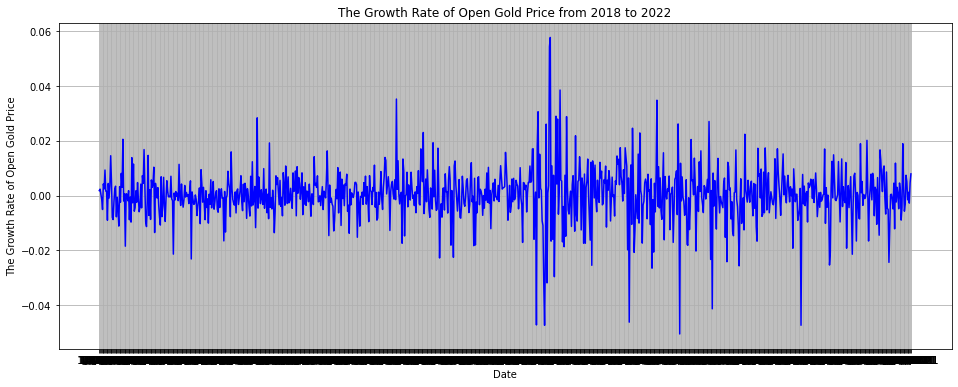

In [16]:
#np library
ln_GoldPrice = np.log(GoldPrice)
#take the natrual log of gdp data
e = ln_GoldPrice.diff(1).dropna()   # take the first difference and drop NaN
#The first year has no growth with the year before the first year

plt.figure(figsize=(16,6))
plt.plot(e, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('The Growth Rate of Open Gold Price')
plt.title('The Growth Rate of Open Gold Price from 2018 to 2022')
plt.grid(True)
plt.show()

In [17]:
#Gold Price is done.

In [18]:
hf = pd.read_csv('USD to Yen Open.csv', index_col='Date')
hf

,USD to Yen Open
Date,
1/2/2018,112.769997
1/3/2018,112.264000
1/4/2018,112.606003
1/5/2018,112.790001
1/8/2018,113.151001
...,...
12/27/2021,114.337997
12/28/2021,114.788002
12/29/2021,114.766998


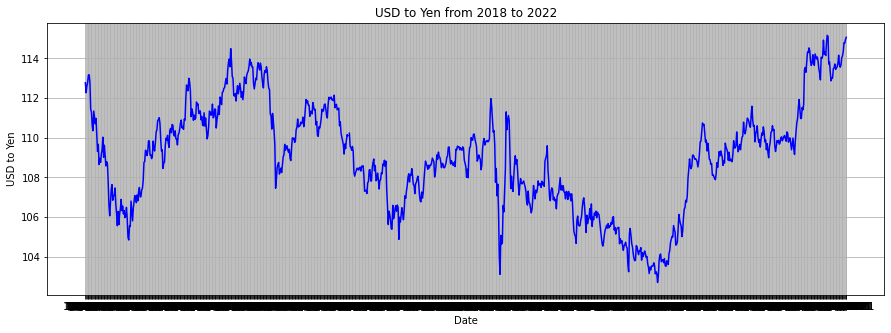

In [19]:
USDtoYen = hf["USD to Yen Open"]
plt.figure(figsize=(15,5))
plt.plot(USDtoYen, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('USD to Yen')
plt.title('USD to Yen from 2018 to 2022')
plt.grid(True)#It controls whether to show the grid in the background
plt.show()

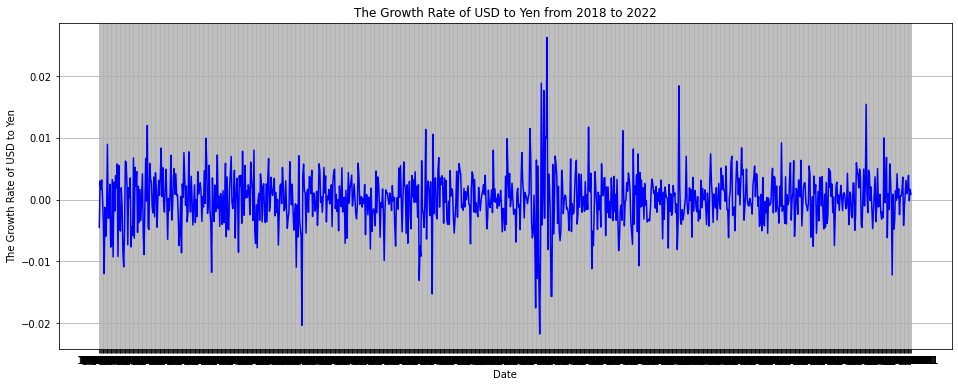

In [20]:
#np library
ln_USDtoYen = np.log(USDtoYen)
#take the natrual log of gdp data
f = ln_USDtoYen.diff(1).dropna()   # take the first difference and drop NaN
#The first year has no growth with the year before the first year

plt.figure(figsize=(16,6))
plt.plot(f, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('The Growth Rate of USD to Yen')
plt.title('The Growth Rate of USD to Yen from 2018 to 2022')
plt.grid(True)
plt.show()

In [21]:
#The USD to Yen is done.

In [22]:
jf = pd.read_csv('NASDAQ Composite Open.csv', index_col='Date')
jf

,NASDAQ Composite Open
Date,
1/2/2018,6937.649902
1/3/2018,7017.069824
1/4/2018,7089.500000
1/5/2018,7105.740234
1/8/2018,7135.379883
...,...
12/27/2021,15696.830080
12/28/2021,15895.200200
12/29/2021,15794.919920


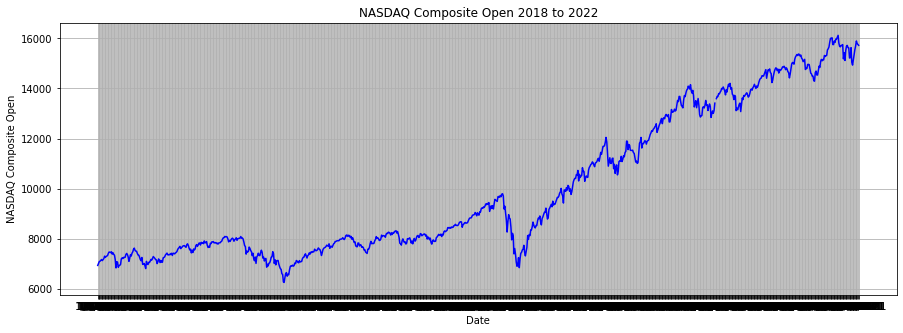

In [23]:
NASDAQ = jf["NASDAQ Composite Open"]
plt.figure(figsize=(15,5))
plt.plot(NASDAQ, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('NASDAQ Composite Open')
plt.title('NASDAQ Composite Open 2018 to 2022')
plt.grid(True)#It controls whether to show the grid in the background
plt.show()

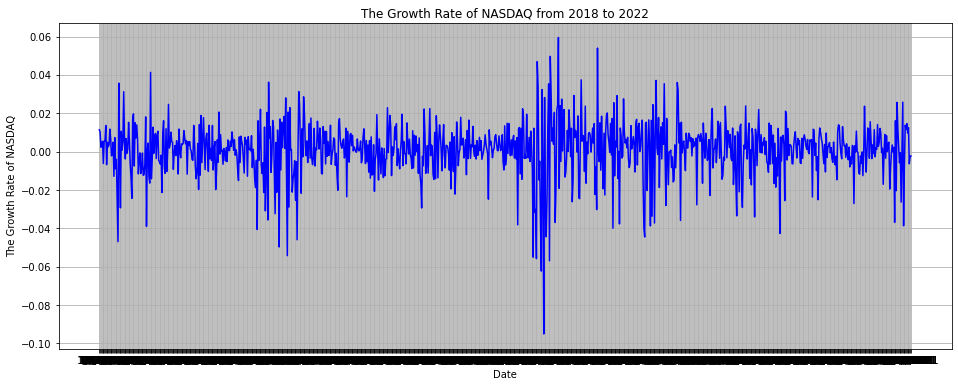

In [24]:
#np library
ln_NASDAQ = np.log(NASDAQ)
#take the natrual log of gdp data
g = ln_NASDAQ.diff(1).dropna()   # take the first difference and drop NaN
#The first year has no growth with the year before the first year

plt.figure(figsize=(16,6))
plt.plot(g, linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('The Growth Rate of NASDAQ')
plt.title('The Growth Rate of NASDAQ from 2018 to 2022')
plt.grid(True)
plt.show()

In [25]:
#NASDAQ is also done.

In [26]:
#VAR PART

In [27]:
#The model between DailyTreasureRate1mo and Bitcoin Price

In [28]:

log_Bitcoin = np.log(Bitcoin) 
log_DailyTreasureRate1mo = np.log(DailyTreasureRate1mo)

E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
log_Bitcoin_diff = log_Bitcoin.diff(1).dropna()  # take the first difference and remove observation that is NaN
log_DailyTreasureRate1mo_diff = log_DailyTreasureRate1mo.diff(1).dropna()   # take the first difference and remove observation that is NaN

In [30]:
m = 10
dataset1 = (pd.concat([log_Bitcoin_diff, log_DailyTreasureRate1mo_diff], axis=1))
#dataset1 = dataset1.dropna(axis=0,subset=['Bitcoin Price: Open (Only Weekdays)', 'Daily Treasury Par Yield Curve Rates 1 Month'])
#datanew = data.dropna()# combine two variables using the function "pd.concat"

dataset1.replace([np.inf, -np.inf], np.nan, inplace=True)

dataset1.dropna(inplace=True)

#repace all the infinite and infinite to nan and drop all the NAN




train_data = dataset1[0:-m]
test_data = dataset1[-m:]

In [31]:
print(dataset1)

            Bitcoin Price: Open (Only Weekdays)  \
Date                                              
1/3/2018                               0.094689   
1/4/2018                               0.019340   
1/5/2018                               0.013432   
1/8/2018                               0.062549   
1/9/2018                              -0.085654   
...                                         ...   
12/27/2021                             0.043782   
12/28/2021                            -0.002419   
12/29/2021                            -0.062194   
12/30/2021                            -0.024084   
12/31/2021                             0.014494   

            Daily Treasury Par Yield Curve Rates 1 Month  
Date                                                      
1/3/2018                                        0.000000  
1/4/2018                                       -0.007782  
1/5/2018                                       -0.007843  
1/8/2018                                 

In [32]:
model = VAR(train_data)         # estimate VAR model
result = model.fit(2)           # VAR(2)
result.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:46
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -9.58442
Nobs:                     971.000    HQIC:                  -9.61553
Log likelihood:           1932.05    FPE:                6.54217e-05
AIC:                     -9.63466    Det(Omega_mle):     6.47531e-05
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                   0.001513         0.001500            1.009           0.313
L1.Bitcoi

In [80]:
#model = VAR(train_data)         # estimate VAR model
#result = model.fit(2)           # VAR(2)
#result.summary()

#print(result.aic)


dic1 = { }
for i in range(1,11):
    model = VAR(train_data)         # estimate VAR model
    result = model.fit(i)      
    dic1[i]= result.aic
    

#print (dic1)
#print(min(dic1, key=dic1.get))
#print(min(dic1.values()))
print("In the VAR model between DailyTreasureRate1mo and Bitcoin Price, the model with the lowest aic is VAR("+str(min(dic1, key=dic1.get))+")")
print("The lowest aic value is "+str(min(dic1.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRate1mo and Bitcoin Price, the model with the lowest aic is VAR(10)
The lowest aic value is -9.659333512461881


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
#log_Bitcoin_diff = log_Bitcoin.diff(1).dropna()   
log_DailyTreasuryRealLongTermRates = np.log(DailyTreasuryRealLongTermRates)
log_DailyTreasuryRealLongTermRates_diff = log_DailyTreasuryRealLongTermRates.diff(1).dropna()  

m = 10
#dataset2 = (pd.concat([log_Bitcoin_diff, log_DailyTreasuryRealLongTermRates_diff], axis=1))
dataset2 = (pd.concat([log_DailyTreasuryRealLongTermRates_diff,log_Bitcoin_diff,], axis=1))
dataset2.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset2.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data2 = dataset2[0:-m]
test_data2 = dataset2[-m:]

E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [81]:
print(dataset2)

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.070952   
...                                         ...   
6/9/2020                              -1.386294   
3/15/2021                             -1.945910   
3/18/2021                              1.252763   
3/19/2021                             -0.336472   
4/12/2021                             -0.693147   

           Bitcoin Price: Open (Only Weekdays)  
Date                                            
1/3/2018                              0.094689  
1/4/2018                              0.019340  
1/5/2018                              0.013432  
1/8/2018                              0.062549  
1/9/2018                             -0.08

In [36]:
model2 = VAR(train_data2)         # estimate VAR model
result2 = model2.fit(2)           # VAR(2)
result2.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -10.2484
Nobs:                     546.000    HQIC:                  -10.2963
Log likelihood:           1279.83    FPE:                3.27322e-05
AIC:                     -10.3272    Det(Omega_mle):     3.21408e-05
--------------------------------------------------------------------
Results for equation Daily Treasury Real Long-Term Rates 
                                             coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------------
const                                          -0.005595         0.005044           -1.109           0.267
L1.Daily Treasury Real Long-Term

In [37]:
dic2 = { }
for i in range(1,11):
    model2 = VAR(train_data2)         # estimate VAR model
    result2 = model2.fit(i)      
    dic2[i]= result2.aic

print("In the VAR model between DailyTreasureRealLongTerm and Bitcoin Price, the model with the lowest aic is VAR("+str(min(dic2, key=dic2.get))+")")
print("The lowest aic value is "+str(min(dic2.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm and Bitcoin Price, the model with the lowest aic is VAR(10)
The lowest aic value is -10.511189821363043


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [38]:
#log_Bitcoin_diff = log_Bitcoin.diff(1).dropna()   
log_DailyTreasuryRealLongTermRates = np.log(DailyTreasuryRealLongTermRates)
log_DailyTreasuryRealLongTermRates_diff = log_DailyTreasuryRealLongTermRates.diff(1).dropna()  

m = 10
#dataset2 = (pd.concat([log_Bitcoin_diff, log_DailyTreasuryRealLongTermRates_diff], axis=1))
dataset3 = (pd.concat([log_Bitcoin_diff,log_DailyTreasuryRealLongTermRates_diff, log_DailyTreasureRate1mo_diff], axis=1))
dataset3.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset3.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data3 = dataset3[0:-m]
test_data3 = dataset3[-m:]

print(dataset3)

           Bitcoin Price: Open (Only Weekdays)  \
Date                                             
1/3/2018                              0.094689   
1/4/2018                              0.019340   
1/5/2018                              0.013432   
1/8/2018                              0.062549   
1/9/2018                             -0.085654   
...                                        ...   
6/9/2020                              0.001464   
3/15/2021                             0.024704   
3/18/2021                             0.035733   
3/19/2021                            -0.017863   
4/12/2021                             0.031215   

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.07

E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
model3 = VAR(train_data3)         # estimate VAR model
result3 = model3.fit(2)           # VAR(2)
result3.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:47
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -16.0888
Nobs:                     546.000    HQIC:                  -16.1896
Log likelihood:           2134.21    FPE:                8.72649e-08
AIC:                     -16.2543    Det(Omega_mle):     8.39929e-08
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.001883         0.002087           -0.903           0.367
L1.Bitcoi

In [40]:
dic3 = { }
for i in range(1,11):
    model3 = VAR(train_data3)         # estimate VAR model
    result3 = model3.fit(i)      
    dic3[i]= result3.aic

print("In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month and Bitcoin Price, the model with the lowest aic is VAR("+str(min(dic3, key=dic3.get))+")")
print("The lowest aic value is "+str(min(dic3.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month and Bitcoin Price, the model with the lowest aic is VAR(6)
The lowest aic value is -17.66784748514151


In [41]:
#This is the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month Bitcoin Price and gold price

#log_Bitcoin_diff = log_Bitcoin.diff(1).dropna()   
log_DailyTreasuryRealLongTermRates = np.log(DailyTreasuryRealLongTermRates)
log_DailyTreasuryRealLongTermRates_diff = log_DailyTreasuryRealLongTermRates.diff(1).dropna()  

log_GoldPrice = np.log(GoldPrice)
log_GoldPrice_diff = log_GoldPrice.diff(1).dropna() 

m = 10
#dataset2 = (pd.concat([log_Bitcoin_diff, log_DailyTreasuryRealLongTermRates_diff], axis=1))
dataset4 = (pd.concat([log_Bitcoin_diff,log_DailyTreasuryRealLongTermRates_diff, log_DailyTreasureRate1mo_diff,log_GoldPrice_diff ], axis=1))
dataset4.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset4.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data4 = dataset4[0:-m]
test_data4 = dataset4[-m:]

print(dataset4)



           Bitcoin Price: Open (Only Weekdays)  \
Date                                             
1/3/2018                              0.094689   
1/4/2018                              0.019340   
1/5/2018                              0.013432   
1/8/2018                              0.062549   
1/9/2018                             -0.085654   
...                                        ...   
6/9/2020                              0.001464   
3/15/2021                             0.024704   
3/18/2021                             0.035733   
3/19/2021                            -0.017863   
4/12/2021                             0.031215   

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.07

E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
E:\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [42]:
model4 = VAR(train_data4)         # estimate VAR model
result4 = model4.fit(2)           # VAR(2)
result4.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:48
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -25.9052
Nobs:                     546.000    HQIC:                  -26.0780
Log likelihood:           4086.62    FPE:                4.22960e-12
AIC:                     -26.1889    Det(Omega_mle):     3.96185e-12
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.001950         0.002085           -0.935           0.350
L1.Bitcoi

In [43]:
dic4 = { }
for i in range(1,11):
    model4 = VAR(train_data4)         # estimate VAR model
    result4 = model4.fit(i)      
    dic4[i]= result4.aic

print("In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month ,Bitcoin Price, and Gold price, the model with the lowest aic is VAR("+str(min(dic4, key=dic4.get))+")")
print("The lowest aic value is "+str(min(dic4.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month ,Bitcoin Price, and Gold price, the model with the lowest aic is VAR(6)
The lowest aic value is -27.654405658343784


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [44]:
#This is the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month Bitcoin Price and USDtoYen

#log_Bitcoin_diff = log_Bitcoin.diff(1).dropna()   
#log_DailyTreasuryRealLongTermRates = np.log(DailyTreasuryRealLongTermRates)
#log_DailyTreasuryRealLongTermRates_diff = log_DailyTreasuryRealLongTermRates.diff(1).dropna()  

log_USDtoYen = np.log(USDtoYen)
log_USDtoYen_diff = log_USDtoYen.diff(1).dropna() 

m = 10
#dataset2 = (pd.concat([log_Bitcoin_diff, log_DailyTreasuryRealLongTermRates_diff], axis=1))
dataset5 = (pd.concat([log_Bitcoin_diff,log_DailyTreasuryRealLongTermRates_diff, log_DailyTreasureRate1mo_diff,log_USDtoYen_diff ], axis=1))
dataset5.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset5.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data5 = dataset5[0:-m]
test_data5 = dataset5[-m:]

print(dataset5)

           Bitcoin Price: Open (Only Weekdays)  \
Date                                             
1/3/2018                              0.094689   
1/4/2018                              0.019340   
1/5/2018                              0.013432   
1/8/2018                              0.062549   
1/9/2018                             -0.085654   
...                                        ...   
6/9/2020                              0.001464   
3/15/2021                             0.024704   
3/18/2021                             0.035733   
3/19/2021                            -0.017863   
4/12/2021                             0.031215   

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.07

In [45]:
model5 = VAR(train_data5)         # estimate VAR model
result5 = model5.fit(2)           # VAR(7)
result5.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:48
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -26.8765
Nobs:                     544.000    HQIC:                  -27.0497
Log likelihood:           4336.17    FPE:                1.60009e-12
AIC:                     -27.1610    Det(Omega_mle):     1.49844e-12
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.001840         0.002095           -0.878           0.380
L1.Bitcoi

In [46]:
dic5 = { }
for i in range(1,11):
    model5 = VAR(train_data5)         # estimate VAR model
    result5 = model5.fit(i)      
    dic5[i]= result5.aic

print("In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month ,Bitcoin Price, and exchange rate of USD to Yen, the model with the lowest aic is VAR("+str(min(dic5, key=dic5.get))+")")
print("The lowest aic value is "+str(min(dic5.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month ,Bitcoin Price, and exchange rate of USD to Yen, the model with the lowest aic is VAR(7)
The lowest aic value is -28.608142710929524


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [47]:
#This is the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month Bitcoin Price and NASDAQ
log_NASDAQ = np.log(NASDAQ)
log_NASDAQ_diff = log_NASDAQ.diff(1).dropna() 

m = 10
#dataset2 = (pd.concat([log_Bitcoin_diff, log_DailyTreasuryRealLongTermRates_diff], axis=1))
dataset6 = (pd.concat([log_Bitcoin_diff,log_DailyTreasuryRealLongTermRates_diff, log_DailyTreasureRate1mo_diff,log_NASDAQ_diff], axis=1))
dataset6.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset6.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data6 = dataset6[0:-m]
test_data6 = dataset6[-m:]

print(dataset6)

           Bitcoin Price: Open (Only Weekdays)  \
Date                                             
1/3/2018                              0.094689   
1/4/2018                              0.019340   
1/5/2018                              0.013432   
1/8/2018                              0.062549   
1/9/2018                             -0.085654   
...                                        ...   
6/9/2020                              0.001464   
3/15/2021                             0.024704   
3/18/2021                             0.035733   
3/19/2021                            -0.017863   
4/12/2021                             0.031215   

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.07

In [48]:
model6 = VAR(train_data6)         # estimate VAR model
result6 = model6.fit(2)           # VAR(2)
result6.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:48
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -24.7258
Nobs:                     546.000    HQIC:                  -24.8986
Log likelihood:           3764.64    FPE:                1.37563e-11
AIC:                     -25.0095    Det(Omega_mle):     1.28854e-11
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.002039         0.002070           -0.985           0.325
L1.Bitcoi

In [49]:
dic6 = { }
for i in range(1,11):
    model6 = VAR(train_data6)         # estimate VAR model
    result6 = model6.fit(i)      
    dic6[i]= result6.aic

print("In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month ,Bitcoin Price, and NASDAQ composite, the model with the lowest aic is VAR("+str(min(dic6, key=dic6.get))+")")
print("The lowest aic value is "+str(min(dic6.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm Dailyinterestrate1month ,Bitcoin Price, and NASDAQ composite, the model with the lowest aic is VAR(6)
The lowest aic value is -26.41656776273776


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [50]:
#Now, we first try to get our best model.
#We try to get it by comparing their AIC.

#By far, we have two interests rate, one Bitcoin price, one gold price, one NASDAQ Composite, and one exchange rate.

#Two interest rates and one Bitcoin price must be included. So, we still have two options from three choices. 


#Gold NASDAQ
#Gold Exchange
#NASDAQ Exchange

In [51]:
#Gold NASDAQ
m = 10

dataset7 = (pd.concat([log_Bitcoin_diff,log_DailyTreasuryRealLongTermRates_diff, log_DailyTreasureRate1mo_diff,log_GoldPrice_diff,log_NASDAQ_diff], axis=1))
dataset7.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset7.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data7 = dataset7[0:-m]
test_data7 = dataset7[-m:]

print(dataset7)

           Bitcoin Price: Open (Only Weekdays)  \
Date                                             
1/3/2018                              0.094689   
1/4/2018                              0.019340   
1/5/2018                              0.013432   
1/8/2018                              0.062549   
1/9/2018                             -0.085654   
...                                        ...   
6/9/2020                              0.001464   
3/15/2021                             0.024704   
3/18/2021                             0.035733   
3/19/2021                            -0.017863   
4/12/2021                             0.031215   

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.07

In [52]:
#This is the model with the lowest BIC
model7 = VAR(train_data7)         # estimate VAR model
result7 = model7.fit(2)           # VAR(2)
result7.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:48
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -34.5285
Nobs:                     546.000    HQIC:                  -34.7925
Log likelihood:           5725.91    FPE:                6.54974e-16
AIC:                     -34.9620    Det(Omega_mle):     5.92804e-16
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.002113         0.002067           -1.022           0.307
L1.Bitcoi

In [53]:
dic7 = { }
for i in range(1,11):
    model7 = VAR(train_data7)         # estimate VAR model
    result7 = model7.fit(i)      
    dic7[i]= result7.aic

print("In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and NASDAQ composite, the model with the lowest aic is VAR("+str(min(dic7, key=dic7.get))+")")
print("The lowest aic value is "+str(min(dic7.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and NASDAQ composite, the model with the lowest aic is VAR(6)
The lowest aic value is -36.37507838772603


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
#Gold Exchange
#By far, the best





m = 10

dataset8 = (pd.concat([log_Bitcoin_diff,log_DailyTreasuryRealLongTermRates_diff, log_DailyTreasureRate1mo_diff,log_GoldPrice_diff,log_USDtoYen_diff], axis=1))
dataset8.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset8.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data8 = dataset8[0:-m]
test_data8 = dataset8[-m:]

print(dataset8)

           Bitcoin Price: Open (Only Weekdays)  \
Date                                             
1/3/2018                              0.094689   
1/4/2018                              0.019340   
1/5/2018                              0.013432   
1/8/2018                              0.062549   
1/9/2018                             -0.085654   
...                                        ...   
6/9/2020                              0.001464   
3/15/2021                             0.024704   
3/18/2021                             0.035733   
3/19/2021                            -0.017863   
4/12/2021                             0.031215   

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.07

In [55]:
model8 = VAR(train_data8)         # estimate VAR model
result8 = model8.fit(6)           # VAR(2) 
#7 is the best
result8.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:49
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -37.4415
Nobs:                     540.000    HQIC:                  -38.1916
Log likelihood:           6765.68    FPE:                1.60193e-17
AIC:                     -38.6734    Det(Omega_mle):     1.21180e-17
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.000769         0.001985           -0.387           0.698
L1.Bitcoi

In [56]:
dic8 = { }
for i in range(1,11):
    model8 = VAR(train_data8)         # estimate VAR model
    result8 = model8.fit(i)      
    dic8[i]= result8.aic

print("In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and Exchange rate of USD to Yen, the model with the lowest aic is VAR("+str(min(dic8, key=dic8.get))+")")
print("The lowest aic value is "+str(min(dic8.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and Exchange rate of USD to Yen, the model with the lowest aic is VAR(7)
The lowest aic value is -38.68971274592201


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [57]:
#NASDAQ Exchange
m = 10

dataset9 = (pd.concat([log_Bitcoin_diff,log_DailyTreasuryRealLongTermRates_diff, log_DailyTreasureRate1mo_diff,log_NASDAQ_diff,log_USDtoYen_diff], axis=1))
dataset9.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset9.dropna(inplace=True)
#repace all the infinite and infinite to nan and drop all the NAN
train_data9 = dataset9[0:-m]
test_data9 = dataset9[-m:]

print(dataset9)

           Bitcoin Price: Open (Only Weekdays)  \
Date                                             
1/3/2018                              0.094689   
1/4/2018                              0.019340   
1/5/2018                              0.013432   
1/8/2018                              0.062549   
1/9/2018                             -0.085654   
...                                        ...   
6/9/2020                              0.001464   
3/15/2021                             0.024704   
3/18/2021                             0.035733   
3/19/2021                            -0.017863   
4/12/2021                             0.031215   

           Daily Treasury Real Long-Term Rates   \
Date                                              
1/3/2018                              -0.014815   
1/4/2018                              -0.015038   
1/5/2018                               0.000000   
1/8/2018                               0.029853   
1/9/2018                               0.07

In [58]:
model9 = VAR(train_data9)         # estimate VAR model
result9 = model9.fit(2)           # VAR(2)
result9.summary()

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:49
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -35.5671
Nobs:                     544.000    HQIC:                  -35.8318
Log likelihood:           5987.95    FPE:                2.31564e-16
AIC:                     -36.0017    Det(Omega_mle):     2.09508e-16
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.002085         0.002074           -1.006           0.315
L1.Bitcoi

In [59]:
dic9 = { }
for i in range(1,11):
    model9 = VAR(train_data9)         # estimate VAR model
    result9 = model9.fit(i)      
    dic9[i]= result9.aic

print("In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, NASDAQ Composite, and Exchange rate of USD to Yen, the model with the lowest aic is VAR("+str(min(dic9, key=dic9.get))+")")
print("The lowest aic value is "+str(min(dic9.values())))

E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, NASDAQ Composite, and Exchange rate of USD to Yen, the model with the lowest aic is VAR(7)
The lowest aic value is -37.398087642821466


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
#So, by far, the best model is the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and Exchange rate of USD to Yen.
#the model with the lowest aic is VAR(7)
#The lowest aic value is -38.68971274592201

#The model with the lowest bic is VAR(6)
#The lowest bic value is -37.441532



#Now, we try to do the impulse responses.

resultBest = model8.fit(7) 
resultBest.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 19, Aug, 2022
Time:                     00:58:49
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -37.2572
Nobs:                     539.000    HQIC:                  -38.1294
Log likelihood:           6782.84    FPE:                1.57654e-17
AIC:                     -38.6897    Det(Omega_mle):     1.14106e-17
--------------------------------------------------------------------
Results for equation Bitcoin Price: Open (Only Weekdays)
                                                     coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------
const                                                  -0.000753         0.001991           -0.378           0.705
L1.Bitcoi

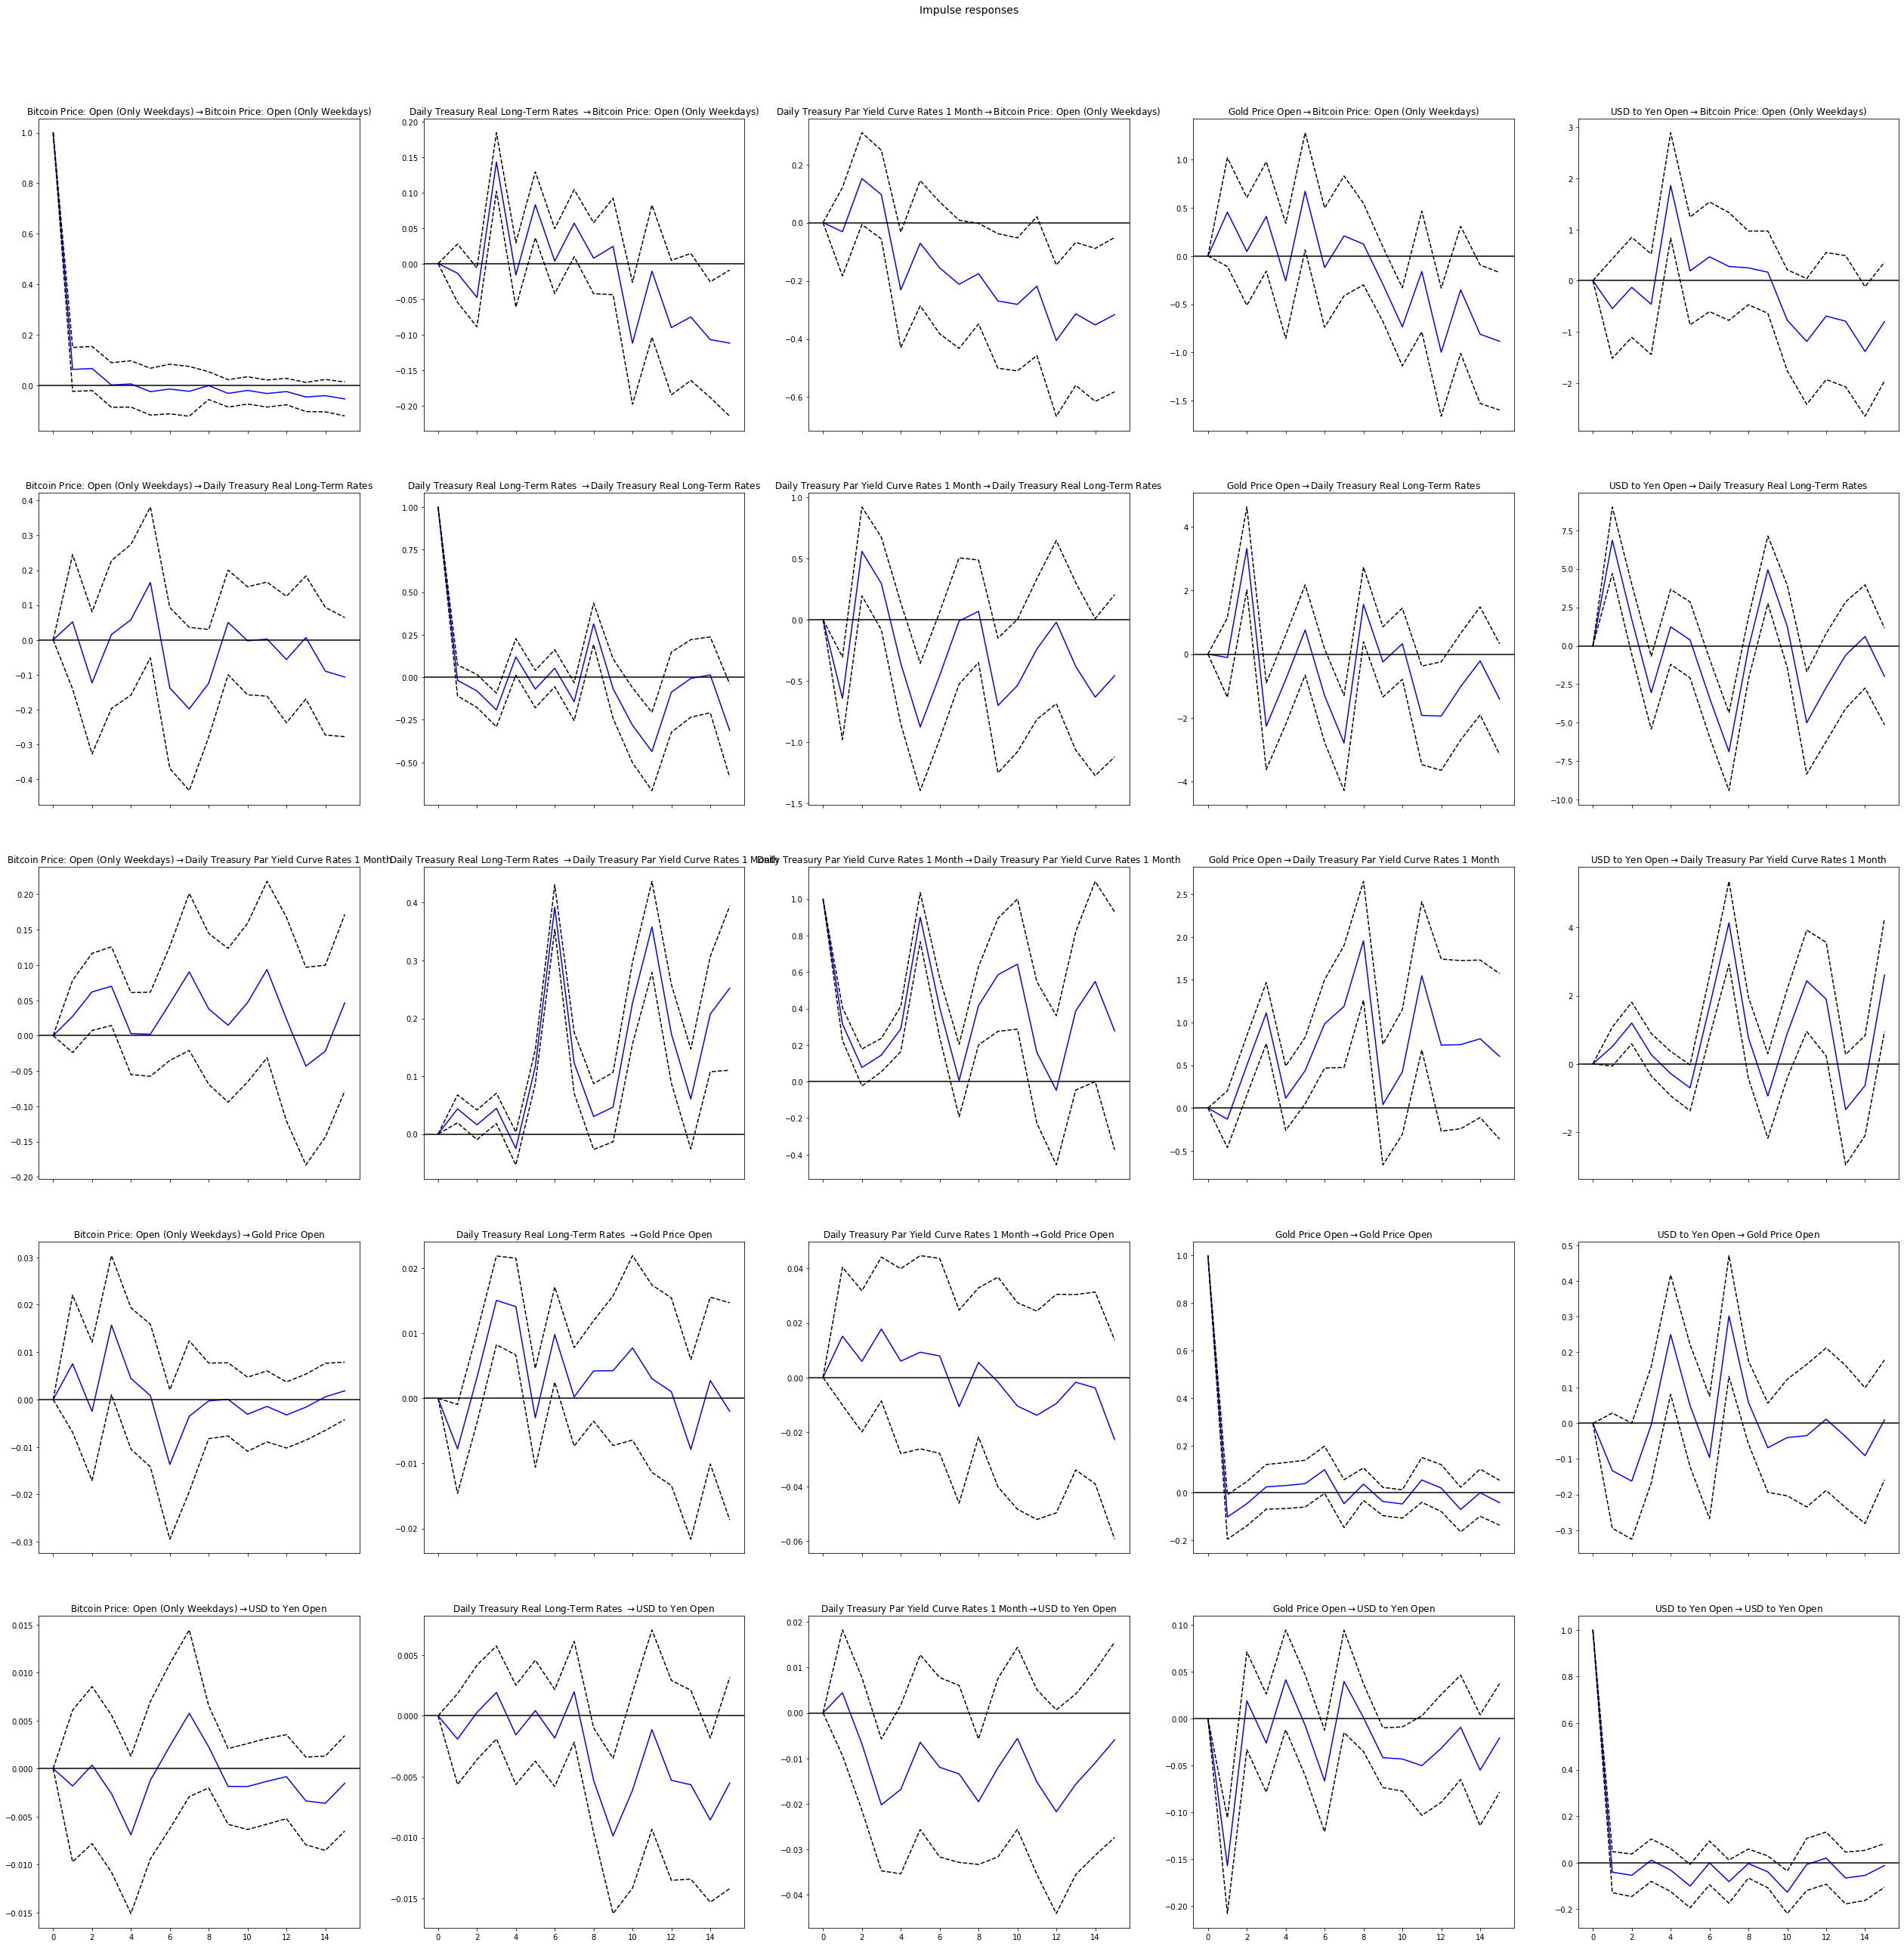

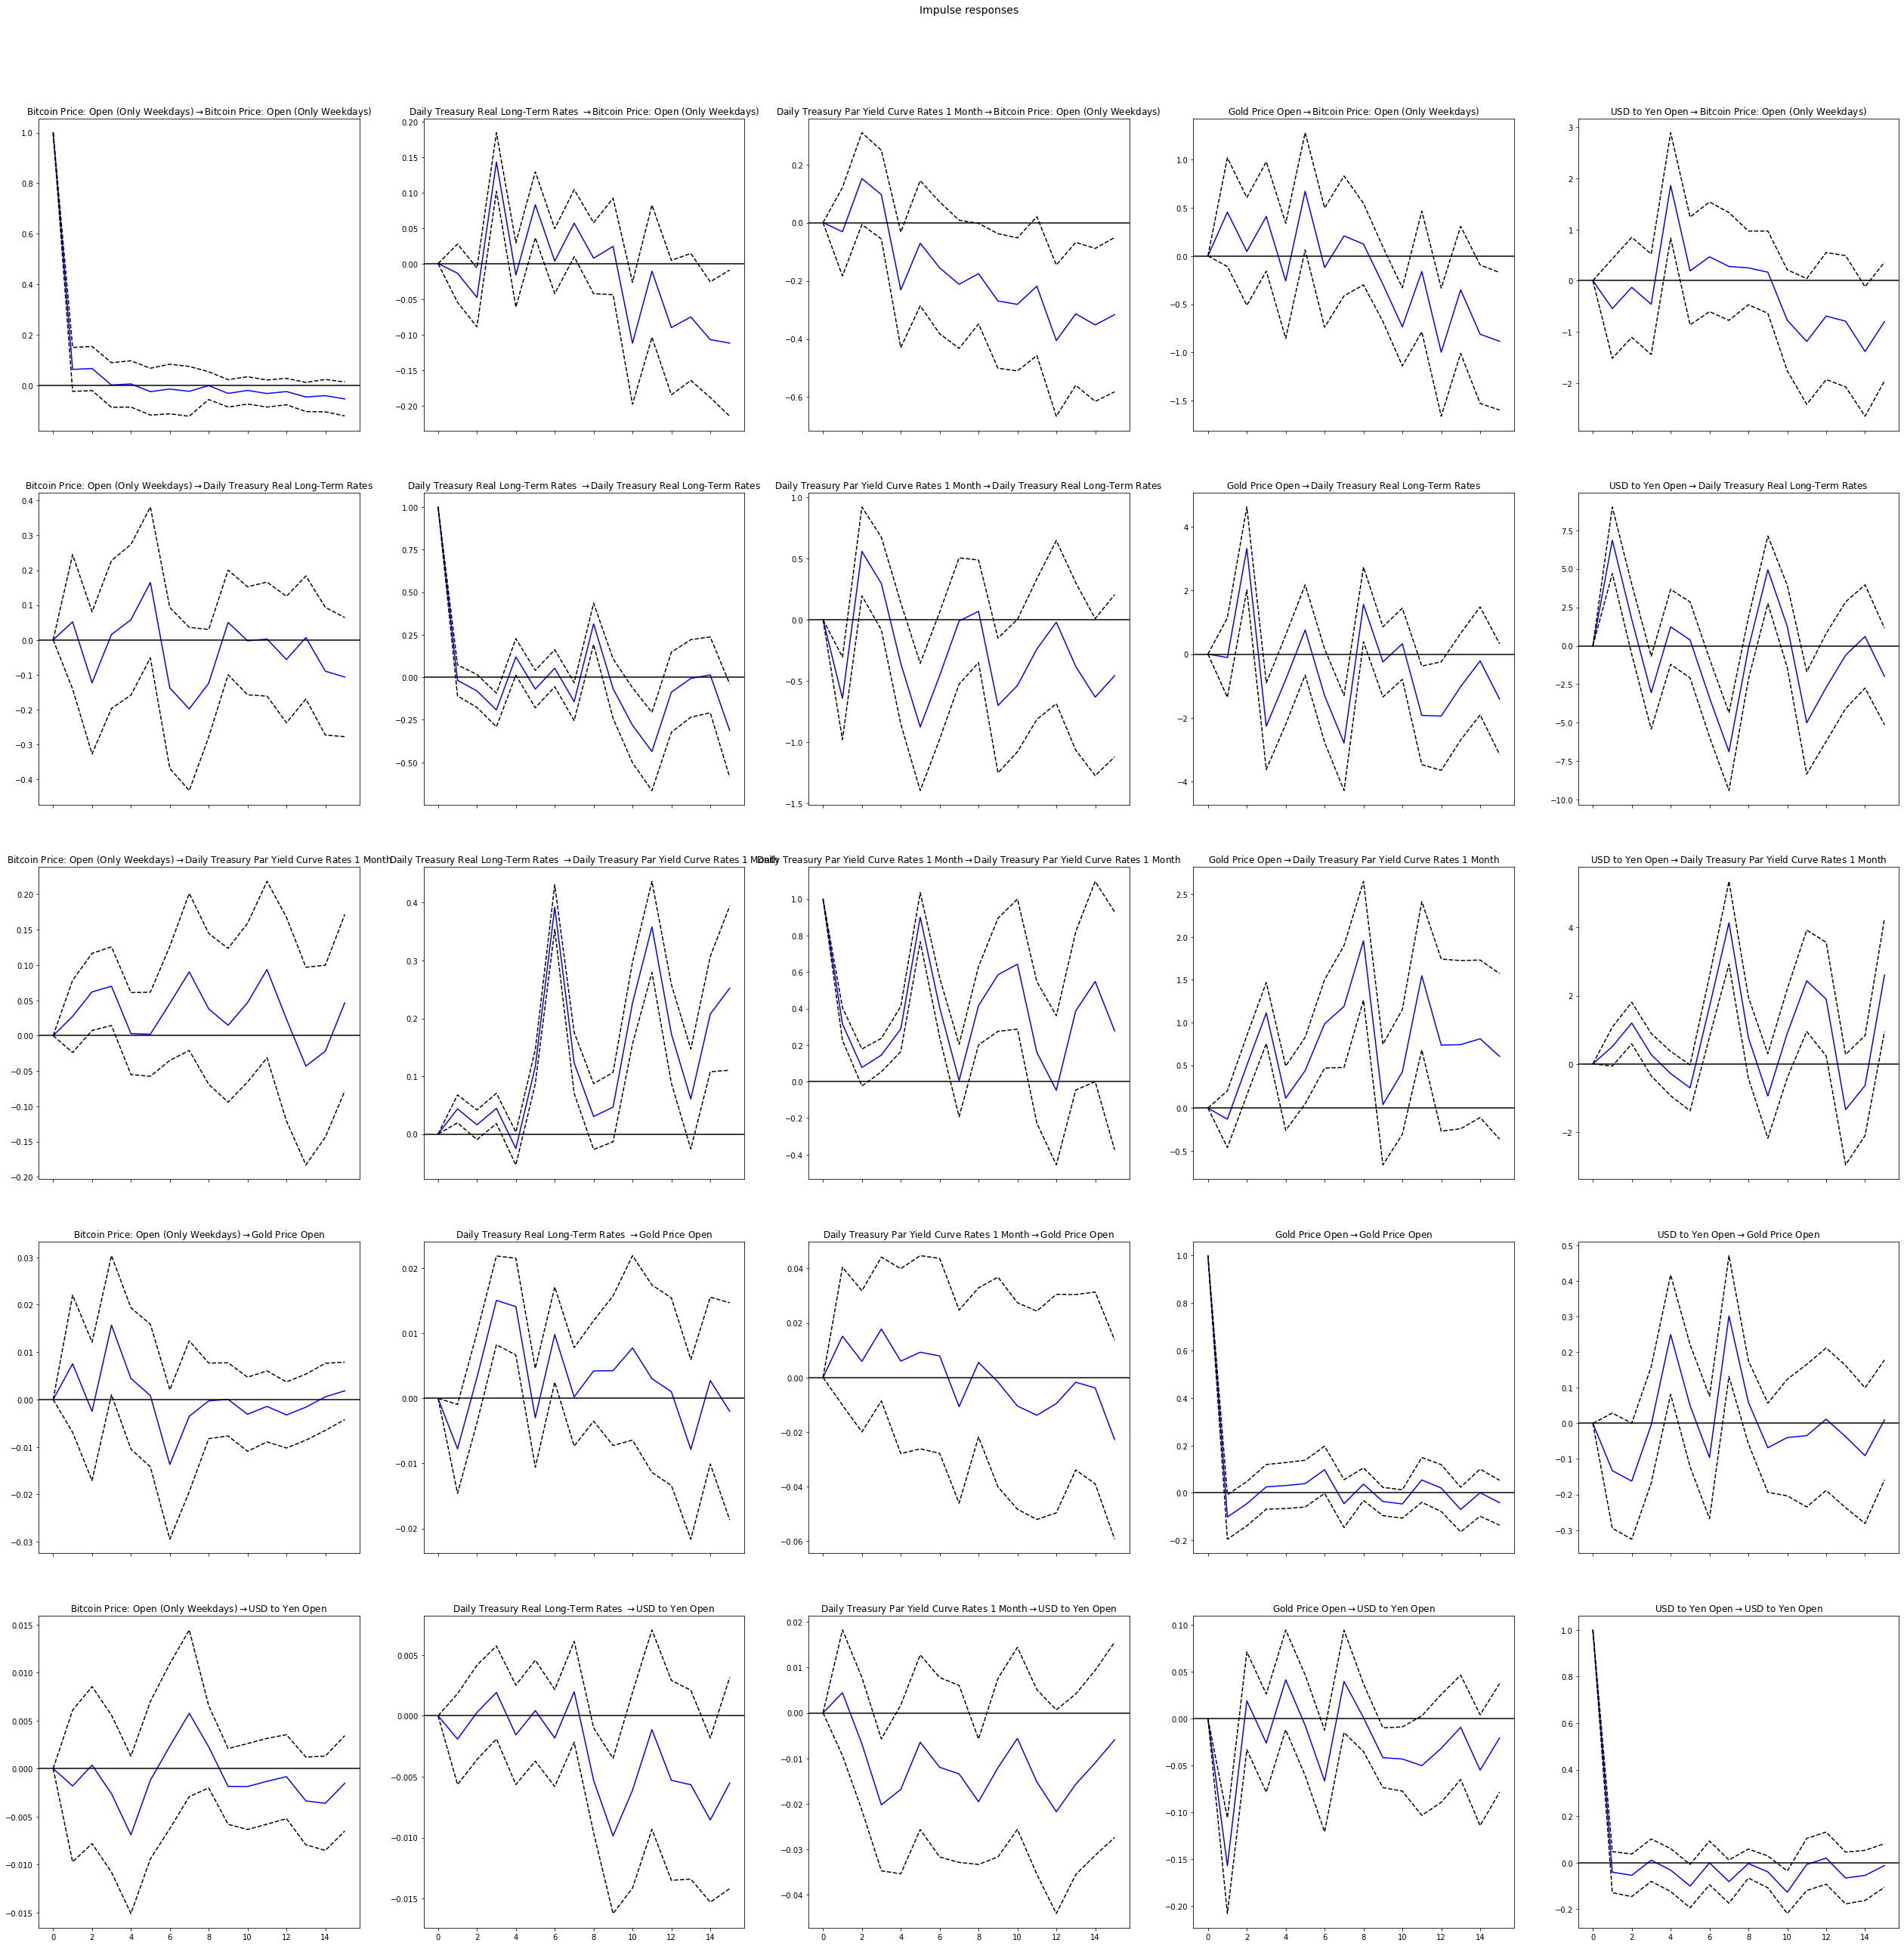

In [61]:
irf = resultBest.irf(15)
#irf.plot(orth=True)
irf.plot(figsize=(38,38))

In [62]:
fevd = resultBest.fevd(10)   # forecast error variance decomposition
fevd.summary()

FEVD for Bitcoin Price: Open (Only Weekdays)
     Bitcoin Price: Open (Only Weekdays)  Daily Treasury Real Long-Term Rates   Daily Treasury Par Yield Curve Rates 1 Month  Gold Price Open  USD to Yen Open
0                               1.000000                              0.000000                                      0.000000         0.000000         0.000000
1                               0.988337                              0.003208                                      0.000234         0.005892         0.002330
2                               0.970222                              0.013477                                      0.008065         0.005830         0.002406
3                               0.886496                              0.089853                                      0.010412         0.009554         0.003685
4                               0.844197                              0.086221                                      0.030637         0.012428         0.026518
5

In [63]:
#This is the part of sensitivity analysis. 
#We try to get the lowest BIC of the three models.

dic9BIC = { }
for i in range(1,11):
    model9 = VAR(train_data9)         # estimate VAR model
    result9 = model9.fit(i)      
    dic9BIC[i]= result9.bic

print("In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, NASDAQ Composite, and Exchange rate of USD to Yen, the model with the lowest bic is VAR("+str(min(dic9BIC, key=dic9BIC.get))+")")
print("The lowest Bic value is "+str(min(dic9BIC.values())))

In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, NASDAQ Composite, and Exchange rate of USD to Yen, the model with the lowest bic is VAR(6)
The lowest Bic value is -36.15995619144737


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In [64]:
dic8BIC = { }
for i in range(1,11):
    model8 = VAR(train_data8)         # estimate VAR model
    result8 = model8.fit(i)      
    dic8BIC[i]= result8.bic

print("In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and Exchange rate of USD to Yen, the model with the lowest bic is VAR("+str(min(dic8BIC, key=dic8BIC.get))+")")
print("The lowest bic value is "+str(min(dic8BIC.values())))

In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and Exchange rate of USD to Yen, the model with the lowest bic is VAR(6)
The lowest bic value is -37.44153200159827


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In [65]:
dic7BIC = { }
for i in range(1,11):
    model7 = VAR(train_data7)         # estimate VAR model
    result7 = model7.fit(i)      
    dic7BIC[i]= result7.bic

print("In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and NASDAQ composite, the model with the lowest bic is VAR("+str(min(dic7BIC, key=dic7BIC.get))+")")
print("The lowest bic value is "+str(min(dic7BIC.values())))

In the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and NASDAQ composite, the model with the lowest bic is VAR(6)
The lowest bic value is -35.14672740945454


E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A 

In [66]:
#So, as we can see, by far, the model with the lowest AIC is VAR(7) of model 8, 
#the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and Exchange rate of USD to Yen.

#By far, the model with the lowest BIC IS VAR(6) of model 8,
#the VAR model between DailyTreasureRealLongTerm, Dailyinterestrate1month ,Bitcoin Price, Gold price, and Exchange rate.




In [67]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.arima.model import ARIMA

from arch import arch_model

In [68]:
Bitcoin_diff = Bitcoin.diff(1).dropna()  # take the first difference 
DailyTreasureRate1mo_diff = DailyTreasureRate1mo.diff(1).dropna()

In [69]:
X = DailyTreasureRate1mo_diff  # X is a matrix of independent variables
X = sm.add_constant(X) # adding a constant
Y = Bitcoin_diff # y is a vector of dependent variable

#Y = list(Y)
#X = list(X)
#print (Y)
#Y1 = log_Bitcoin_diff.astype({'Date':'string'})



modelq = sm.OLS(Y, X)
results = modelq.fit()
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Bitcoin Price: Open (Only Weekdays)   R-squared:                       0.000
Model:                                             OLS   Adj. R-squared:                 -0.001
Method:                                  Least Squares   F-statistic:                    0.3591
Date:                                 Fri, 19 Aug 2022   Prob (F-statistic):              0.549
Time:                                         00:58:54   Log-Likelihood:                -8516.9
No. Observations:                                 1000   AIC:                         1.704e+04
Df Residuals:                                      998   BIC:                         1.705e+04
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                        

In [70]:
X = DailyTreasureRate1mo  # X is a matrix of independent variables
X = sm.add_constant(X) # adding a constant
Y = Bitcoin         # y is a vector of dependent variable

model1 = sm.OLS(Y, X)
results1 = model1.fit()
z = results1.resid
z.name = 'residuals'
lag_z = z.shift(1).dropna()  

In [71]:
result_volume = adfuller(z)    # adfuller is the function of doing ADF test
print('ADF Statistic: %f' % result_volume[0])
print('p-value: %f' % result_volume[1])


#So, for this one: its not stationary. So we have no long-term relationship. 
#So, we are not necessarily have to use the ERROR correction model.

ADF Statistic: -1.622325
p-value: 0.471511


In [72]:
XX = pd.concat([DailyTreasureRate1mo_diff, lag_z], axis=1) 

XX = sm.add_constant(XX) # adding a constant
YY = Bitcoin_diff        
model2 = sm.OLS(YY, XX)
result2 = model2.fit()
print(result2.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Bitcoin Price: Open (Only Weekdays)   R-squared:                       0.003
Model:                                             OLS   Adj. R-squared:                  0.001
Method:                                  Least Squares   F-statistic:                     1.520
Date:                                 Fri, 19 Aug 2022   Prob (F-statistic):              0.219
Time:                                         00:58:54   Log-Likelihood:                -8515.6
No. Observations:                                 1000   AIC:                         1.704e+04
Df Residuals:                                      997   BIC:                         1.705e+04
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
                                        

In [73]:
Bitcoin_diff = Bitcoin.diff(1).dropna()  # take the first difference 
DailyTreasuryRealLongTermRates_diff = DailyTreasuryRealLongTermRates.diff(1).dropna()

In [74]:
X = DailyTreasuryRealLongTermRates_diff  # X is a matrix of independent variables
X = sm.add_constant(X) # adding a constant
Y = Bitcoin_diff # y is a vector of dependent variable

#Y = list(Y)
#X = list(X)
#print (Y)
#Y1 = log_Bitcoin_diff.astype({'Date':'string'})



modelq = sm.OLS(Y, X)
results = modelq.fit()
print(results.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Bitcoin Price: Open (Only Weekdays)   R-squared:                       0.000
Model:                                             OLS   Adj. R-squared:                 -0.001
Method:                                  Least Squares   F-statistic:                   0.08689
Date:                                 Fri, 19 Aug 2022   Prob (F-statistic):              0.768
Time:                                         00:58:54   Log-Likelihood:                -8517.0
No. Observations:                                 1000   AIC:                         1.704e+04
Df Residuals:                                      998   BIC:                         1.705e+04
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                        

In [75]:
X = DailyTreasuryRealLongTermRates  # X is a matrix of independent variables
X = sm.add_constant(X) # adding a constant
Y = Bitcoin         # y is a vector of dependent variable

model1 = sm.OLS(Y, X)
results1 = model1.fit()
z = results1.resid
z.name = 'residuals'
lag_z = z.shift(1).dropna()  

In [78]:
result_volume = adfuller(z)    # adfuller is the function of doing ADF test
print('ADF Statistic: %f' % result_volume[0])
print('p-value: %f' % result_volume[1])

ADF Statistic: -1.593430
p-value: 0.486893


In [79]:
XX = pd.concat([DailyTreasuryRealLongTermRates_diff, lag_z], axis=1) 

XX = sm.add_constant(XX) # adding a constant
YY = Bitcoin_diff        
model2 = sm.OLS(YY, XX)
result2 = model2.fit()
print(result2.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Bitcoin Price: Open (Only Weekdays)   R-squared:                       0.003
Model:                                             OLS   Adj. R-squared:                  0.001
Method:                                  Least Squares   F-statistic:                     1.692
Date:                                 Fri, 19 Aug 2022   Prob (F-statistic):              0.185
Time:                                         00:59:40   Log-Likelihood:                -8515.4
No. Observations:                                 1000   AIC:                         1.704e+04
Df Residuals:                                      997   BIC:                         1.705e+04
Df Model:                                            2                                         
Covariance Type:                             nonrobust                                         
                                        